In [1]:
import os
import re
import nrrd

import numpy as np
import pandas as pd

from scipy import stats

from ioutil import relative_paths

#from skimage.measure import compare_ssim as ssim

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams, cycler
from matplotlib.colors import ListedColormap

%matplotlib inline

In [ ]:
patient_id = np.load('./../../data_source/patient_id.npy')

In [19]:
paths_to_ct = relative_paths('./../../data_source/images/ct_nrrd', target_format='nrrd')
paths_to_pet = relative_paths('./../../data_source/images/pet_nrrd', target_format='nrrd')
paths_to_mask = relative_paths('./../../data_source/images/masks_nrrd', target_format='nrrd')

ct = {}
pet = {}
mask = {}
ct_cropped = {}
pet_cropped = {}

for num, path_to_ct in enumerate(paths_to_ct):
    
    ct_image, _ = nrrd.read(path_to_ct)
    ct[path_to_ct] = ct_image

    pet_image, _ = nrrd.read(paths_to_pet[num])
    pet[paths_to_pet[num]] = pet_image
    
    mask_image, _ = nrrd.read(paths_to_mask[num])
    mask[paths_to_mask[num]] = mask_image
    
    ct_cropped[path_to_ct] = ct[path_to_ct] * mask_image

    pet_cropped[paths_to_pet[num]] = pet[paths_to_pet[num]] * mask_image

# Thresholding bone

In [30]:
def gl_window(image, lower_thresh, upper_thresh):
    
    _image = np.copy(image)
    _image[image == 0] = np.mean(image)
    
    _image[image < lower_thresh] = 0
    _image[image > upper_thresh] = 0
 
    return _image

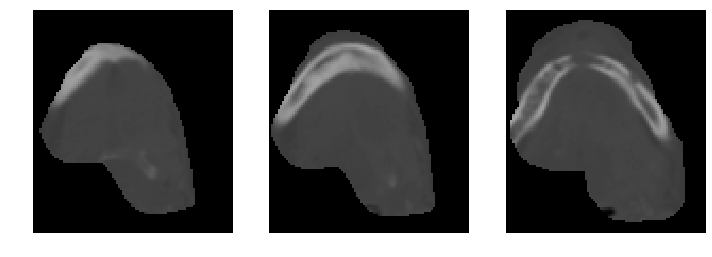

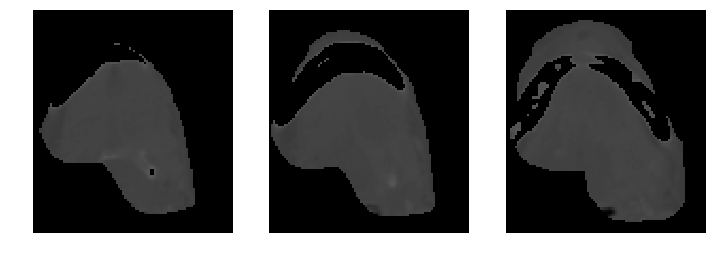

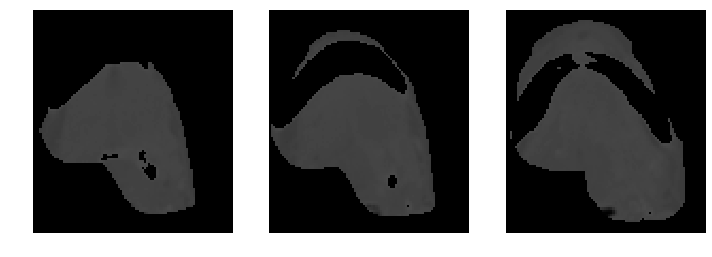

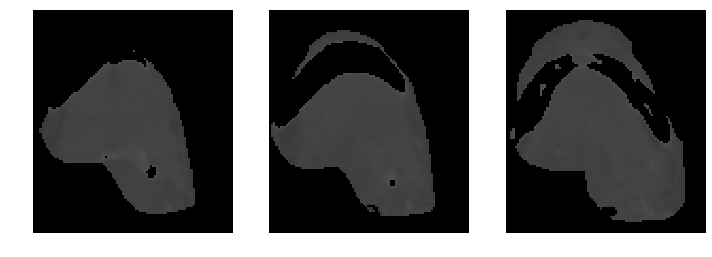

In [97]:
# NOTE:
# * 1300, 1200 for soft tissue on contrast CT (https://en.wikipedia.org/wiki/Hounsfield_scale).
# * Link empirical threholds to median, mode and quantile statistics.


images_to_plot = [
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 46],
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 50],
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 63],
]
fig, axes = plt.subplots(nrows=int(len(images_to_plot) / 3), ncols=3, figsize=(10, 10))
for num, axis in enumerate(axes.ravel()):
    # Resize images to tumor volume region.
    axis.imshow(
        #gl_threshold(images_to_plot[num], thresh), 
        images_to_plot[num],
        cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    )
    vmin=np.min(images_to_plot[num]),
    vmax=np.max(images_to_plot[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()


upper_thresh = 1400
lower_thresh = 10

images_to_plot = [
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 46],
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 50],
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 63],
]
fig, axes = plt.subplots(nrows=int(len(images_to_plot) / 3), ncols=3, figsize=(10, 10))
for num, axis in enumerate(axes.ravel()):
    # Resize images to tumor volume region.
    axis.imshow(
        gl_window(images_to_plot[num], lower_thresh, upper_thresh),
        cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    )
    vmin=np.min(images_to_plot[num]),
    vmax=np.max(images_to_plot[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()


upper_thresh = 1200
lower_thresh = 10
images_to_plot = [
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 46],
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 50],
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 63],
]
fig, axes = plt.subplots(nrows=int(len(images_to_plot) / 3), ncols=3, figsize=(10, 10))
for num, axis in enumerate(axes.ravel()):
    # Resize images to tumor volume region.
    axis.imshow(
        #gl_threshold(images_to_plot[num], thresh), 
        gl_window(images_to_plot[num], lower_thresh, upper_thresh),
        cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    )
    vmin=np.min(images_to_plot[num]),
    vmax=np.max(images_to_plot[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()


upper_thresh = 1100
lower_thresh = 10
images_to_plot = [
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 46],
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 50],
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 63],
]
fig, axes = plt.subplots(nrows=int(len(images_to_plot) / 3), ncols=3, figsize=(10, 10))
for num, axis in enumerate(axes.ravel()):
    # Resize images to tumor volume region.
    #img = images_to_plot[num]
    #img = img[img != 0]
    # Resize images to tumor volume region.
    upper_thresh = np.percentile(img, 90) + 8 * stats.iqr(img)
    lower_thresh = np.percentile(img, 10) - 8 * stats.iqr(img)
    axis.imshow(
        #gl_threshold(images_to_plot[num], thresh), 
        gl_window(images_to_plot[num], lower_thresh, upper_thresh),
        cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    )
    vmin=np.min(images_to_plot[num]),
    vmax=np.max(images_to_plot[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()

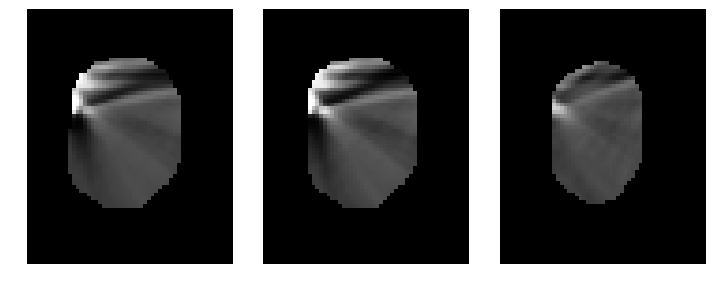

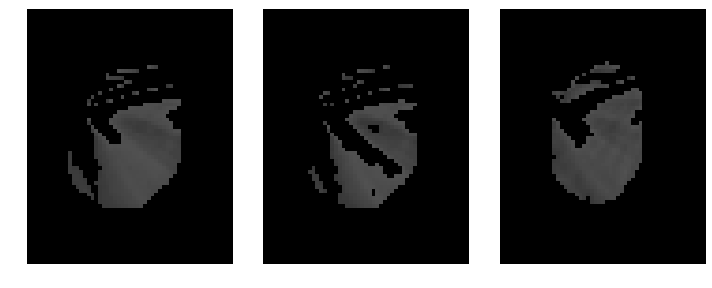

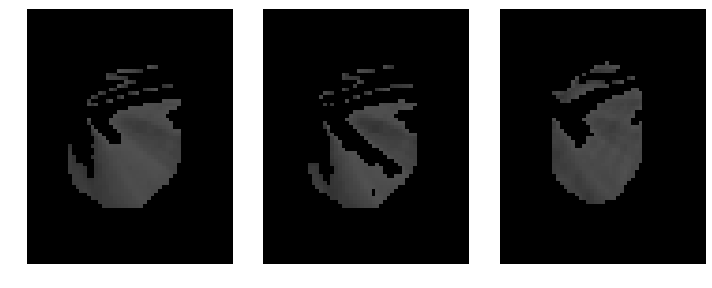

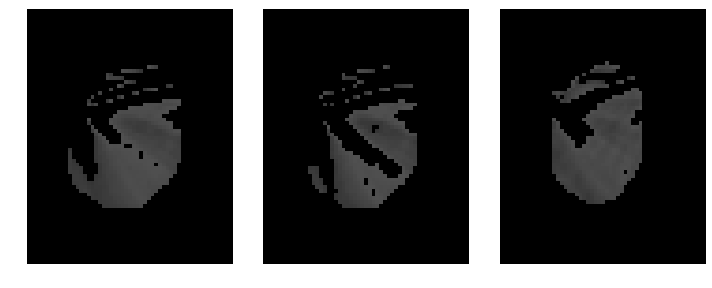

In [98]:
images_to_plot = [
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 58],
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 59],
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 61],
]
fig, axes = plt.subplots(nrows=int(len(images_to_plot) / 3), ncols=3, figsize=(10, 10))
for num, axis in enumerate(axes.ravel()):
    # Resize images to tumor volume region.
    axis.imshow(
        #gl_threshold(images_to_plot[num], thresh), 
        images_to_plot[num],
        cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    )
    vmin=np.min(images_to_plot[num]),
    vmax=np.max(images_to_plot[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()


upper_thresh = 1300
lower_thresh = 900

images_to_plot = [
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 58],
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 59],
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 61],
]
fig, axes = plt.subplots(nrows=int(len(images_to_plot) / 3), ncols=3, figsize=(10, 10))
for num, axis in enumerate(axes.ravel()):
    # Resize images to tumor volume region.
    axis.imshow(
        #gl_threshold(images_to_plot[num], thresh), 
        gl_window(images_to_plot[num], lower_thresh, upper_thresh),
        cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    )
    vmin=np.min(images_to_plot[num]),
    vmax=np.max(images_to_plot[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()



# NOTE: 
# * Use 1300, 1200 for soft tissue on contrast CT (https://en.wikipedia.org/wiki/Hounsfield_scale).
upper_thresh = 1300
lower_thresh = 800

images_to_plot = [
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 58],
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 59],
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 61],
]
fig, axes = plt.subplots(nrows=int(len(images_to_plot) / 3), ncols=3, figsize=(10, 10))
for num, axis in enumerate(axes.ravel()):
    # Resize images to tumor volume region.
    axis.imshow(
        #gl_threshold(images_to_plot[num], thresh), 
        gl_window(images_to_plot[num], lower_thresh, upper_thresh),
        cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    )
    vmin=np.min(images_to_plot[num]),
    vmax=np.max(images_to_plot[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()


upper_thresh = 1300
lower_thresh = 750
images_to_plot = [    
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 58],
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 59],
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 61],
]
fig, axes = plt.subplots(nrows=int(len(images_to_plot) / 3), ncols=3, figsize=(10, 10))
for num, axis in enumerate(axes.ravel()):
    #img = images_to_plot[num]
    #img = img[img != 0]
    # Resize images to tumor volume region.
    upper_thresh = np.percentile(img, 90) + 8 * stats.iqr(img)
    lower_thresh = np.percentile(img, 10) - 8 * stats.iqr(img)
    axis.imshow(
        #gl_threshold(images_to_plot[num], thresh), 
        gl_window(images_to_plot[num], lower_thresh, upper_thresh),
        cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    )
    vmin=np.min(images_to_plot[num]),
    vmax=np.max(images_to_plot[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()

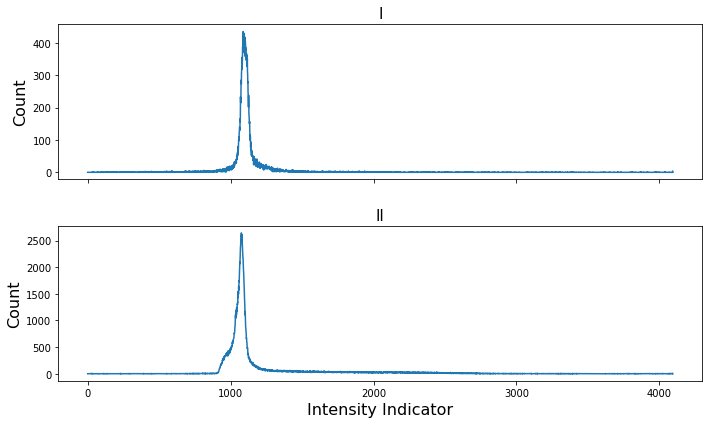

In [33]:
# Model the histogram of good images and discard slices with values outside this histogram.


imgs = [
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'],
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd']
]
# Try bins: 32, 64, 128 as in feature extraction.
fig, axes = plt.subplots(nrows=len(imgs), figsize=(10, 6), sharex=True)
titles = ['I', 'II']
for num, axis in enumerate(axes.ravel()):
    img = imgs[num]
    # NOTE: Skip background voxels.
    hist, _ = np.histogram(np.squeeze(img[img != 0].ravel()), bins=np.linspace(0, 2**12, 2**12))
    axes[num].set_title(titles[num], fontsize=15)
    axes[num].plot(np.arange(np.size(hist)), np.squeeze(hist))
    axes[num].set_ylabel('Count', fontsize=16)
    
plt.xlabel('Intensity Indicator', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# GL Median Mode Inferring Window Settings

In [151]:
def gl_median_mode(image):
    
    _image = np.copy(image)
    _image = _image[image != 0]
    
    mode, _ = stats.mode(_image, axis=None)
    return {
        'gl_mean': np.mean(_image),
        'gl_median': np.median(_image),
        'gl_mode': float(mode),
    }

In [152]:
# Parameters:
# * The window level (WL)/window center, is the midpoint of the range of the CT numbers displayed.
# * The window width (WW) is the measure of the range of CT numbers that an image contains.

# Complete image statistics. 
ct_median_mode, pet_median_mode = {}, {}
for num, (pet_image, ct_image) in enumerate(zip(pet.values(), ct.values())):
  
    pet_median_mode[num] = gl_median_mode(pet_image)
    ct_median_mode[num] = gl_median_mode(ct_image)
    
# Cropped image statistics.
ct_cropped_median_mode, pet_cropped_median_mode = {}, {}
for num, (cropped_pet_image, cropped_ct_image) in enumerate(zip(pet_cropped.values(), ct_cropped.values())):
    
    pet_cropped_median_mode[num] = gl_median_mode(cropped_pet_image)
    ct_cropped_median_mode[num] = gl_median_mode(cropped_ct_image)
    
    
df_ct_median_mode = pd.DataFrame(ct_median_mode)
df_ct_cropped_median_mode = pd.DataFrame(ct_cropped_median_mode)

df_pet_median_mode = pd.DataFrame(pet_median_mode)
df_pet_cropped_median_mode = pd.DataFrame(pet_cropped_median_mode)

df_ct_median_mode.columns = patient_id
df_ct_cropped_median_mode.columns = patient_id

df_pet_median_mode = patient_id
df_pet_cropped_median_mode.columns = patient_id

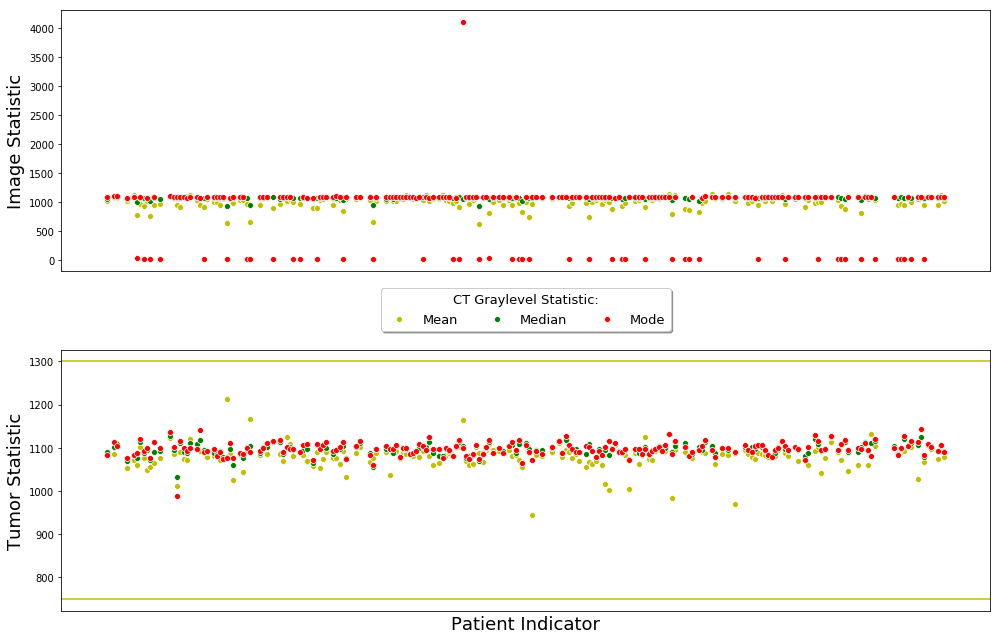

In [156]:
# Observations:
# * Median (considering cropped tumor volume in windowing) appears to be most stable statistic compared to mode 
#   and mean.

rcParams['axes.prop_cycle'] = cycler(color=['y', 'g', 'r'])
fig, (image_axis, cropped_axis) = plt.subplots(
    nrows=2, sharex=True, figsize=(14, 9)
)
labels = ['Mean', 'Median', 'Mode']
for num, (ct_cropped_row_label, ct_row_label) in enumerate(zip(df_ct_cropped_median_mode.T, df_ct_median_mode.T)):
    # Plot image stats.
    sns.scatterplot(
        x=np.squeeze(df_ct_median_mode.columns.values), 
        y=np.squeeze(df_ct_median_mode.loc[ct_row_label, :].values),
        ax=image_axis,
    )
    # Plot tupr stats.
    sns.scatterplot(
        x=np.squeeze(df_ct_cropped_median_mode.columns.values), 
        y=np.squeeze(df_ct_cropped_median_mode.loc[ct_cropped_row_label, :].values),
        ax=cropped_axis,
        label=labels[num]
    )
cropped_axis.legend(
    title='CT Graylevel Statistic:',
    title_fontsize=13,
    fontsize=13, 
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.26),
    ncol=4, 
    fancybox=True, 
    shadow=True
)
image_axis.set_ylabel('Image Statistic', fontsize=18)
cropped_axis.set_ylabel('Tumor Statistic', fontsize=18)
plt.xlabel('Patient Indicator', fontsize=18)
plt.xticks([])

cropped_axis.axhline(y=1300)
cropped_axis.axhline(y=750)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig(
    './ct_median_model.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100, 
)

In [155]:
# NOTE: Median is the statistic with the smallest STD across cropped CT scans compared to mean and mode.

print(np.std(df_ct_cropped_median_mode.loc['gl_mean', :]))
print(np.std(df_ct_cropped_median_mode.loc['gl_median', :])) 
print(np.std(df_ct_cropped_median_mode.loc['gl_mode', :]))

28.365603912350053
13.329979903627521
15.942900203268719


In [159]:
def mad(X):
    
    return np.median(np.abs(X - np.median(X)))

In [180]:
img_bone = ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 49]
img_streaks = ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 58]

img_bone = img_bone[img_bone != 0]
img_streaks = img_streaks[img_streaks != 0]

median_bone = np.median(img_bone)
media_streaks = np.median(img_streaks)

mad_bone = mad(img_bone)
mad_streaks = mad(img_streaks)

median_bone, media_streaks, mad_bone, mad_streaks

(1077.8443580529488, 1181.7294575417716, 29.336962005035502, 178.2404440375372)

# Inspecting Samples with Extreme Statitics

In [81]:
# NOTE: Patient ID is set as column labels.
np.where(df_ct_median_mode.loc['gl_mode', :] > 3000)

(array([83]),)

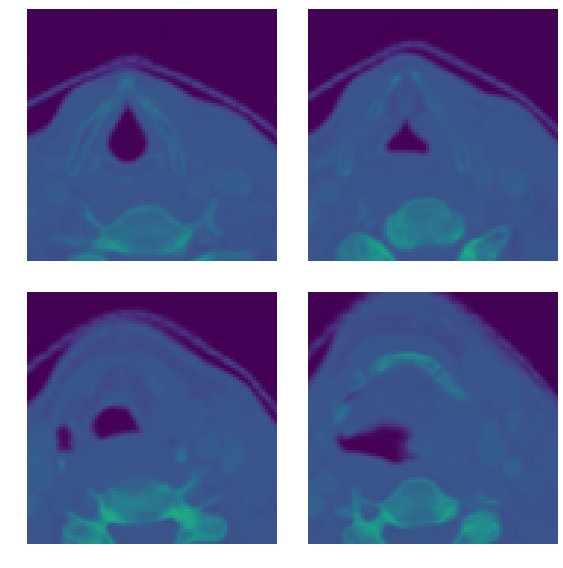

In [92]:
# Inspecting image with highest mode value.
images_to_plot = [
    ct['./../../data_source/images/ct_nrrd/P083CT.nrrd'][:, :, 10],
    ct['./../../data_source/images/ct_nrrd/P083CT.nrrd'][:, :, 20],
    ct['./../../data_source/images/ct_nrrd/P083CT.nrrd'][:, :, 30],
    ct['./../../data_source/images/ct_nrrd/P083CT.nrrd'][:, :, 40],
]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
for num, axis in enumerate(axes.ravel()):
    axis.imshow(
        images_to_plot[num], #cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    ),
    #axis.set_title(titles[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()

In [94]:
# NOTE: Patient ID is set as column labels.
np.where(df_ct_cropped_median_mode.loc['gl_mode', :] < 1000)

(array([14]),)

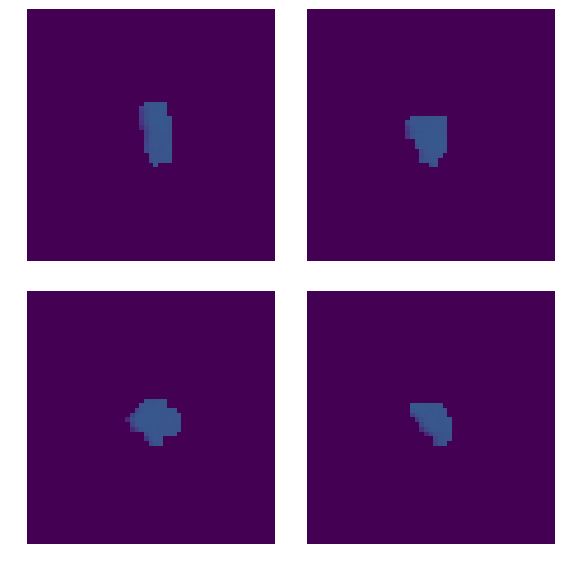

In [101]:
# Inspecting image with lowest mode value.
images_to_plot = [
    ct_cropped['./../../data_source/images/ct_nrrd/P014CT.nrrd'][:, :, 20],
    ct_cropped['./../../data_source/images/ct_nrrd/P014CT.nrrd'][:, :, 27],
    ct_cropped['./../../data_source/images/ct_nrrd/P014CT.nrrd'][:, :, 35],
    ct_cropped['./../../data_source/images/ct_nrrd/P014CT.nrrd'][:, :, 40],
]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
for num, axis in enumerate(axes.ravel()):
    axis.imshow(
        images_to_plot[num], #cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    ),
    #axis.set_title(titles[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()

# GL percentiles

In [103]:
def gl_percentiles(image):
        
    # Remove zeros from the image since it distrupts 
    # percentile statistics.
    _tmp = image[image != 0].ravel()
    return {
        #'percentile_95': np.percentile(_tmp, 95),
        'percentile_90': np.percentile(_tmp, 90),
        #'percentile_85': np.percentile(_tmp, 85),
        'percentile_80': np.percentile(_tmp, 80),
        #'percentile_75': np.percentile(_tmp, 75),
        'percentile_70': np.percentile(_tmp, 70),
        #'percentile_65': np.percentile(_tmp, 55),
        'percentile_60': np.percentile(_tmp, 50),
    }

In [104]:
# Histogram statistics on tumor (not cropped) images.
ct_cropped_quant, pet_cropped_quant = {}, {}
for num, (pet_image, ct_image) in enumerate(zip(pet_cropped.values(), ct_cropped.values())):
    
    pet_cropped_quant[num] = gl_percentiles(pet_image)
    ct_cropped_quant[num] = gl_percentiles(ct_image)

# Sanity check: Adjusting to Python counting logic.
assert num == np.size(patient_id) - 1

df_ct_cropped_quant = pd.DataFrame(ct_cropped_quant)
df_pet_cropped_quant = pd.DataFrame(pet_cropped_quant)

df_ct_cropped_quant.columns = patient_id
df_pet_cropped_quant.columns = patient_id

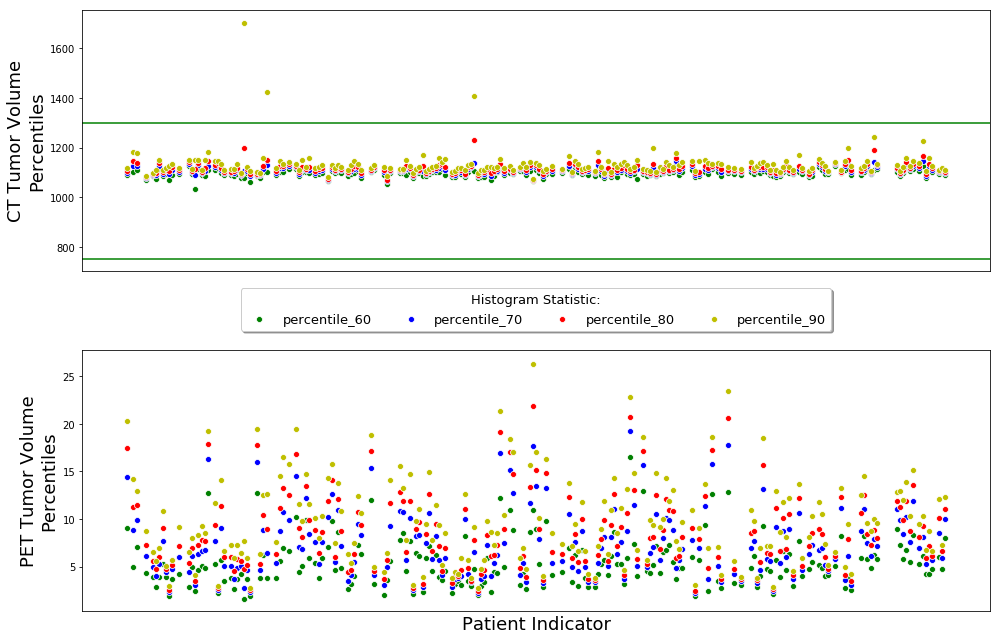

In [158]:
# Purpose:
# * Motivate a threshold signifying presence of artifacts.

# A percentile (or a centile) is a measure used in statistics indicating the value below which a 
# given percentage of observations in a group of observations falls. For example, the 20th percentile 
# is the value (or score) below which 20% of the observations may be found.  
# Plot CT image and tumor GL histogram stats. 

# Observations: 
# * One patient distriguished by large 95th percentile. Image stack contains much straking artifacts.
# * All but 90th percentile is within 750-1300 limit.

labels = pd.DataFrame(ct_cropped_quant).index
colours = ['g', 'b', 'r', 'y', 'm', 'k', 'c']
rcParams['axes.prop_cycle'] = cycler(color=colours[:len(labels)])

fig, (ct_axis, pet_axis) = plt.subplots(nrows=2, sharex=True, figsize=(14, 9))
for num, (ct_row_label, pet_row_label) in enumerate(zip(df_ct_cropped_quant.T, df_pet_cropped_quant.T)):
    sns.scatterplot(
        x=np.squeeze(df_ct_cropped_quant.columns.values), 
        y=np.squeeze(df_ct_cropped_quant.loc[ct_row_label].values),
        ax=ct_axis,
    )
    sns.scatterplot(
        x=np.squeeze(df_pet_cropped_quant.columns.values), 
        y=np.squeeze(df_pet_cropped_quant.loc[pet_row_label].values),
        ax=pet_axis,
        label=labels[num]
    )

pet_axis.legend(
    title='Histogram Statistic:',
    title_fontsize=13,
    fontsize=13, 
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.26),
    ncol=6, 
    fancybox=True, 
    shadow=True
)
ct_axis.set_ylabel('CT Tumor Volume\nPercentiles', fontsize=18)
#ct_axis.axhline(y=1250, c='k')
pet_axis.set_ylabel('PET Tumor Volume\nPercentiles', fontsize=18)
plt.xlabel('Patient Indicator', fontsize=18)
plt.xticks([])

ct_axis.axhline(y=1300)
ct_axis.axhline(y=750)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig(
    './pet_ct_percentiles.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100, 
)

# Inferring Windowing Parameters from Image Histogram

In [ ]:
base = './../../data_source/images/ct_cropped_clean_nrrd/'

paths = []
ct_cropped2 = {}
i = 0
for num, fname in enumerate(os.listdir(base)):
    
    path_to_file = os.path.join(base, fname)
    paths.append(path_to_file)
    
    if path_to_file.endswith('.nrrd'):
        img, _ = nrrd.read(path_to_file)
        ct_cropped2[i] = img
        i = i + 1

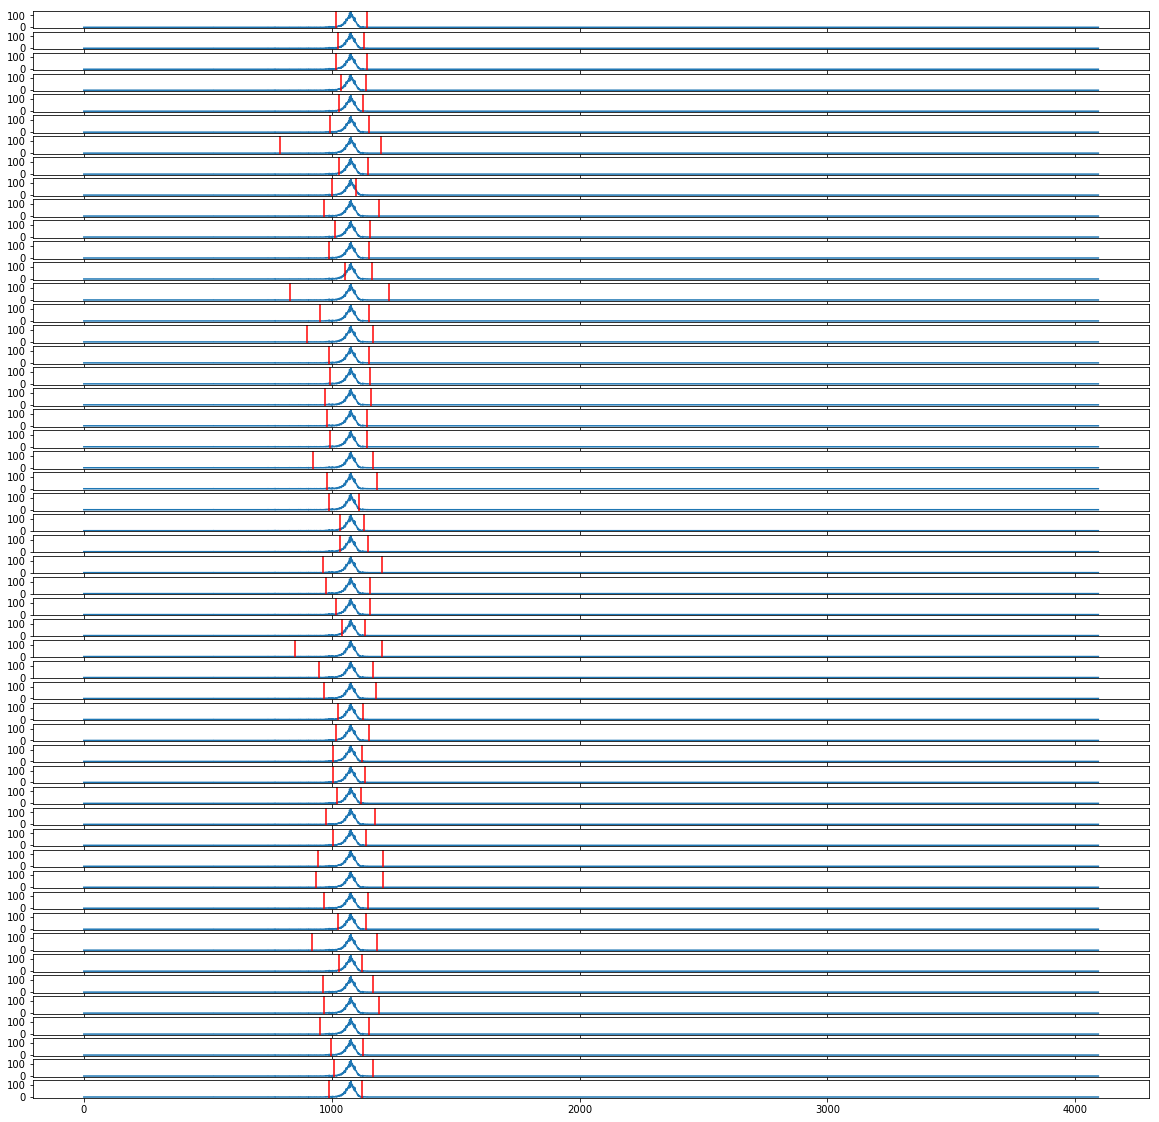

In [321]:
"""
An outlier is an observation that lies outside the overall pattern of a distribution (Moore and McCabe 1999).
A convenient definition of an outlier is a point which falls more than 1.5 times the interquartile range above 
the third quartile or below the first quartile. 

    IQR = Q_3 - Q_1
    
Upper and lower thresholds
    
    Q_3 + 1.5 * IQR
    Q_1 - 1.5 * IQR

REF: http://mathworld.wolfram.com/Outlier.html
REF: Moore, D. S. and McCabe, G. P. Introduction to the Practice of Statistics, 3rd ed. New York: W. H. Freeman, 1999. 
"""

imgs = list(ct_cropped2.values())        
fig, axes = plt.subplots(nrows=len(imgs), figsize=(20, 20), sharex=True)
titles = ['I', 'II', 'III', 'IV']
for num, axis in enumerate(axes.ravel()):
    
    image = imgs[num]
    _, _, num_slices = np.shape(image)

    _image = np.copy(image)
    _image[image == 0] = np.nan    
    hist, _ = np.histogram(np.squeeze(img), bins=np.linspace(0, 2**12, 2**12))
    # NOTE: Skip background voxels.
    hist = hist[1:]
    axes[num].plot(np.arange(np.size(hist)), np.squeeze(hist))
    
    # Learn threshold values from image without interfering background.
    upper_thresh = np.nanpercentile(_image, 75) + 1.5 * stats.iqr(_image, nan_policy='omit')
    lower_thresh = np.nanpercentile(_image, 25) - 3 * stats.iqr(_image, nan_policy='omit')
    axes[num].axvline(x=upper_thresh, c='r')
    axes[num].axvline(x=lower_thresh, c='r')
    #axes[num].axis('off')
    